In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("C:\\Users\\Ajay\\OneDrive\\Desktop\\internships tasks\\Task1.xlsx")


In [4]:
df

,Order_ID,Date,Region,Product,Category,Sales,Quantity,Profit
0,1001,2024-01-05,South,Laptop,Electronics,55000,1,8000
1,1002,2024-01-06,North,Chair,Furniture,4500,2,900
2,1003,2024-01-07,East,Phone,Electronics,22000,1,3000
3,1004,2024-01-08,West,Table,Furniture,12000,1,2500
4,1005,2024-01-09,South,Headphones,Electronics,3000,3,600
5,1006,2024-01-10,North,Sofa,Furniture,35000,1,7000
6,1007,2024-01-11,East,Monitor,Electronics,15000,1,2000
7,1008,2024-01-12,West,Desk,Furniture,18000,1,3500
8,1009,2024-01-13,South,Phone,Electronics,22000,1,3000
9,1010,2024-01-14,North,Desk,Furniture,18000,1,3500


In [5]:
print("===== DATA PREVIEW =====")
print(df.head())

print("\n===== DATA STRUCTURE =====")
print(df.info())

print("\n===== STATISTICAL SUMMARY =====")
print(df.describe())

===== DATA PREVIEW =====
   Order_ID       Date Region     Product     Category  Sales  Quantity  \
0      1001 2024-01-05  South      Laptop  Electronics  55000         1   
1      1002 2024-01-06  North       Chair    Furniture   4500         2   
2      1003 2024-01-07   East       Phone  Electronics  22000         1   
3      1004 2024-01-08   West       Table    Furniture  12000         1   
4      1005 2024-01-09  South  Headphones  Electronics   3000         3   

   Profit  
0    8000  
1     900  
2    3000  
3    2500  
4     600  

===== DATA STRUCTURE =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Order_ID  10 non-null     int64         
 1   Date      10 non-null     datetime64[ns]
 2   Region    10 non-null     object        
 3   Product   10 non-null     object        
 4   Category  10 non-null     object        
 

In [6]:
# Step 1: Business Questions
# -------------------------------
print("\nSTEP 1: Business Questions")
print("1. Which region generates the highest sales?")
print("2. Which category is most profitable?")
print("3. Are higher sales giving higher profit?")
print("4. Which product has low profit despite high sales?")

# -------------------------------
# Step 2: Data Structure
# -------------------------------
print("\nSTEP 2: Missing Values")
print(df.isnull().sum())

print("\nSTEP 2: Duplicate Records")
print(df.duplicated().sum())


STEP 1: Business Questions
1. Which region generates the highest sales?
2. Which category is most profitable?
3. Are higher sales giving higher profit?
4. Which product has low profit despite high sales?

STEP 2: Missing Values
Order_ID    0
Date        0
Region      0
Product     0
Category    0
Sales       0
Quantity    0
Profit      0
dtype: int64

STEP 2: Duplicate Records
0


In [7]:
# Step 3: Trends and Patterns
# -------------------------------
print("\nSTEP 3: Sales by Region")
region_sales = df.groupby("Region")["Sales"].sum()
print(region_sales)

print("\nRegion with highest sales:")
print(region_sales.idxmax())

print("\nSTEP 3: Profit by Category")
category_profit = df.groupby("Category")["Profit"].sum()
print(category_profit)

print("\nMost profitable category:")
print(category_profit.idxmax())


STEP 3: Sales by Region
Region
East     37000
North    57500
South    80000
West     30000
Name: Sales, dtype: int64

Region with highest sales:
South

STEP 3: Profit by Category
Category
Electronics    16600
Furniture      17400
Name: Profit, dtype: int64

Most profitable category:
Furniture


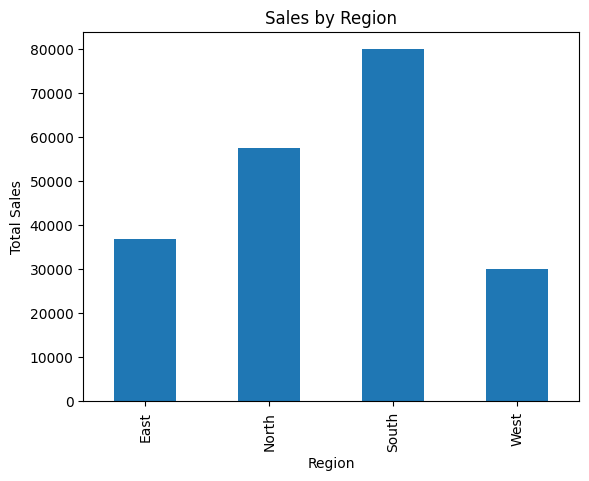

In [8]:
# Visualization: Sales by Region
region_sales.plot(kind="bar")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

In [9]:
# Step 4: Hypothesis Testing
# -------------------------------
print("\nSTEP 4: Correlation between Sales and Profit")
correlation = df["Sales"].corr(df["Profit"])
print("Correlation value:", correlation)

if correlation > 0.5:
    print("Conclusion: Higher sales generally lead to higher profit.")
else:
    print("Conclusion: Sales do not strongly affect profit.")



STEP 4: Correlation between Sales and Profit
Correlation value: 0.959178980450121
Conclusion: Higher sales generally lead to higher profit.



STEP 5: Checking for Outliers in Sales


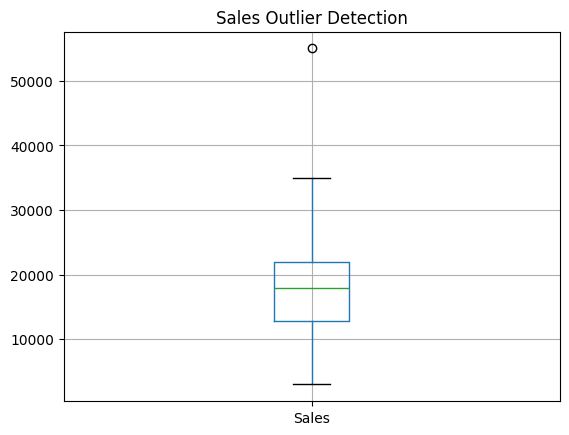


Products with high sales but low profit:
  Product  Sales  Profit
2   Phone  22000    3000
8   Phone  22000    3000

===== EDA COMPLETED =====


In [10]:
# Step 5: Detect Data Issues
# -------------------------------
print("\nSTEP 5: Checking for Outliers in Sales")
df.boxplot(column="Sales")
plt.title("Sales Outlier Detection")
plt.show()

# Find products with high sales but low profit
print("\nProducts with high sales but low profit:")

low_profit_threshold = df["Profit"].mean()
high_sales_threshold = df["Sales"].mean()

low_profit_high_sales = df[
    (df["Sales"] > high_sales_threshold) &
    (df["Profit"] < low_profit_threshold)
]

print(low_profit_high_sales[["Product", "Sales", "Profit"]])

print("\n===== EDA COMPLETED =====")

In [12]:
df.to_excel("C:\\Users\\Ajay\\OneDrive\\Desktop\\internships tasks\\EDA_Task1.xlsx",index=False)
